## MNIST Example
By: Sentdex

Deep Learning with Python, TensorFlow, and Keras tutorial

In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of handwitten digits of 0 to 9 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

/Users/Samuel/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


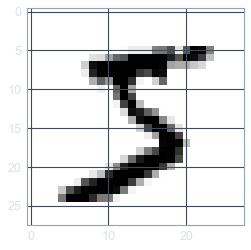

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [4]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


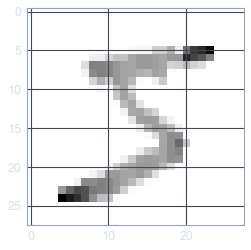

In [5]:
# scale column-wise
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [6]:
model = tf.keras.models.Sequential()
# flatten the 28x28 multi-dimensional array into one flat array
model.add(tf.keras.layers.Flatten())
# 128 fully-connected neurons, relu
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# output layer has to be 10, since its 10 classes and we want a probability distribution (softmax)
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 40s 665us/step - loss: 0.2574 - acc: 0.9253
Epoch 2/3
60000/60000 [==============================] - 44s 739us/step - loss: 0.1033 - acc: 0.9682
Epoch 3/3
60000/60000 [==============================] - 60s 992us/step - loss: 0.0715 - acc: 0.9770


In [7]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)
print(val_loss, val_accuracy)

10000/10000 [==============================] - 3s 253us/step
0.09413113803751767 0.9711


In [8]:
## saving a model
model.save("mnist_demo.model")

In [10]:
# load the model
new_model = tf.keras.models.load_model("mnist_demo.model")
# predict() expects a list
predictions = new_model.predict([x_test])
predictions[0]

array([9.5671282e-08, 4.4222538e-06, 6.3342988e-05, 1.8543756e-04,
       1.3865754e-09, 1.5255044e-06, 2.9080346e-13, 9.9972743e-01,
       1.1857503e-06, 1.6552554e-05], dtype=float32)

In [12]:
import numpy as np 

print(np.argmax(predictions[0]))
print(np.argmax(predictions[1]))

7
2


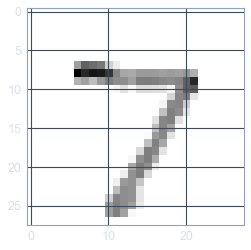

In [14]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

---

## Cats vs Dogs

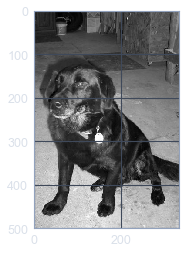

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = '/Users/Samuel/Datasets/PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to cat or dog dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [9]:
print(img_array, img_array.shape)

[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]] (500, 333)


Observe that the shape of our `img_array` is (500, 333), and that conceptually is because we have 500 rows with 333 columns. The `IMREAD_GRAYSCALE` method converts our pixels to different shades of gray. If we have left out the method and read the image in as RGB, we would have (500, 333, 3) as the shape:

In [8]:
img_array_original = cv2.imread(os.path.join(path,img))
print(img_array_original, img_array_original.shape)

[[[ 25  32  65]
  [ 26  34  64]
  [ 27  35  65]
  ...
  [ 95 119 143]
  [110 133 159]
  [105 129 157]]

 [[ 23  30  63]
  [ 24  32  62]
  [ 25  33  63]
  ...
  [105 129 153]
  [115 138 164]
  [106 130 158]]

 [[ 24  31  64]
  [ 25  33  63]
  [ 25  33  63]
  ...
  [111 135 159]
  [117 140 166]
  [105 129 157]]

 ...

 [[207 205 211]
  [194 192 198]
  [213 211 217]
  ...
  [218 206 206]
  [210 196 197]
  [200 186 187]]

 [[203 201 207]
  [190 188 194]
  [212 210 216]
  ...
  [213 201 201]
  [203 189 190]
  [196 182 183]]

 [[172 170 176]
  [168 166 172]
  [204 202 208]
  ...
  [206 194 194]
  [194 180 181]
  [191 177 178]]] (500, 333, 3)


500 x 333 is not the size for all our pictures in that directory - if you take a peek you'd realize that some pics are taller while others ware wider. Let's convert them to be of the same size (50px x 50px for example):

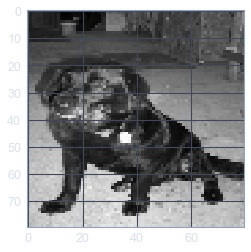

In [54]:
IMG_SIZE = 80
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [55]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to cat or dog dir
        # CATEGORIES.index('Dog') prints 0
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                # do resizing
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [56]:
print(len(training_data))

24946


In [57]:
import random 

random.shuffle(training_data)

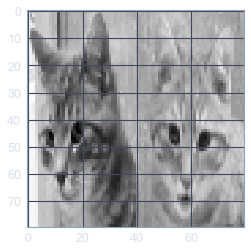

In [58]:
# take a look at one of the first 10 images
random_num = random.randint(0,9)
plt.imshow(training_data[random_num][0], cmap="gray")
plt.show()

In [61]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
# reshape(pick-the-value-for-us, 80, 80, 1 because its grayscale; 3 if rgb)
# since we have 29446 examples, that should be chosen in place of the -1
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X.shape

(24946, 80, 80, 1)

In [67]:
X.shape

(24946, 80, 80, 1)

### Saving to Pickle

In [68]:
import pickle

with open('X.pickle', 'wb') as pickle_out:
    pickle.dump(X, pickle_out)

with open('y.pickle', 'wb') as pickle_out:
    pickle.dump(y, pickle_out)


In [70]:
with open('X.pickle', 'rb') as pickle_in:
    X = pickle.load(pickle_in)

print(X.shape)

(24946, 80, 80, 1)
